In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets, tree,metrics
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()

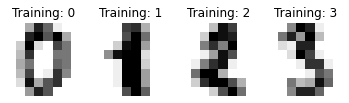

In [3]:
_, axes  = plt.subplots(1,4)
images_and_labels = list(zip(digits.images,digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Training: %i' % label)
plt.show()

In [4]:
n_samples= len(digits.images)
data=digits.images.reshape((n_samples,-1))

In [5]:
classifier = tree.DecisionTreeClassifier(criterion="entropy",random_state=33)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data,digits.target,test_size=0.2,shuffle=False)

In [7]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

In [8]:
predicted=classifier.predict(X_test)

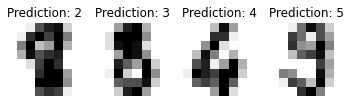

In [9]:
_, axes  = plt.subplots(1,4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
plt.show()

Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.72      0.64      0.68        36
           2       0.76      0.74      0.75        35
           3       0.69      0.59      0.64        37
           4       0.86      0.84      0.85        37
           5       0.80      0.95      0.86        37
           6       0.97      0.95      0.96        37
           7       0.78      0.86      0.82        36
           8       0.79      0.82      0.81        33
           9       0.72      0.70      0.71        37

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.79       360
weighted avg       0.80      0.80      0.79       360


Confusion matrix:
[[31  0  0  0  1  0  0  0  1  2]
 [ 0 23  0  2  2  0  0  1  1  7]
 [ 1  2 26  0  0  1  0  3  2  0]
 [ 0  4  2 22  0  4  0  

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


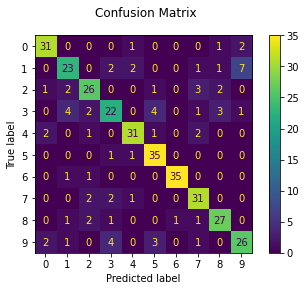

In [10]:
print("Classification report for classifier %s:\n%s\n"
     % (classifier, metrics.classification_report(y_test,predicted)))
disp = metrics.plot_confusion_matrix(classifier,X_test,y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s"%disp.confusion_matrix)

In [11]:
from PIL import Image, ImageOps
import numpy as np

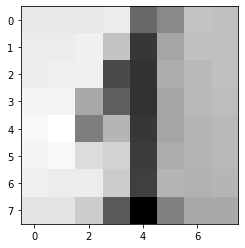

In [12]:
img = Image.open('sample_1.jpg').convert("L").resize((8,8))
img = ImageOps.invert(img)
im2arr = np.array(img)
plt.imshow(im2arr,cmap = plt.cm.gray_r,interpolation='nearest')

In [13]:
img1d = im2arr.reshape([1,64])
img1d[img1d>109]=155
img1d[img1d<110]=0
img1d

array([[  0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0,   0, 155,
          0,   0,   0,   0,   0,   0, 155, 155,   0,   0,   0,   0,   0,
          0, 155, 155,   0,   0,   0,   0,   0,   0,   0, 155,   0,   0,
          0,   0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0,   0,
        155,   0,   0,   0,   0,   0,   0, 155, 155,   0,   0,   0]],
      dtype=uint8)

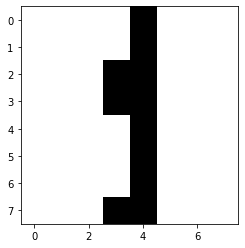

In [14]:
plt.imshow(im2arr,cmap = plt.cm.gray_r,interpolation='nearest')

In [15]:
y_pred = classifier.predict(img1d)
print(y_pred)

[1]


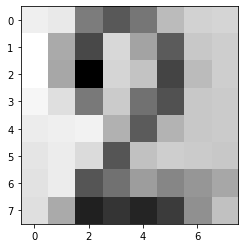

In [16]:
img2 = Image.open('sample_2.jpg').convert("L").resize((8,8))
img2 = ImageOps.invert(img2)
im2arr2 = np.array(img2)
plt.imshow(im2arr2,cmap = plt.cm.gray_r,interpolation='nearest')

In [17]:
img1d2 = im2arr2.reshape([1,64])
img1d2[img1d2>109]=155
img1d2[img1d2<110]=0
img1d2

array([[  0,   0, 155, 155, 155,   0,   0,   0,   0,   0, 155,   0,   0,
        155,   0,   0,   0,   0, 155,   0,   0, 155,   0,   0,   0,   0,
        155,   0, 155, 155,   0,   0,   0,   0,   0,   0, 155,   0,   0,
          0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0, 155, 155,
          0, 155,   0,   0,   0,   0, 155, 155, 155, 155,   0,   0]],
      dtype=uint8)

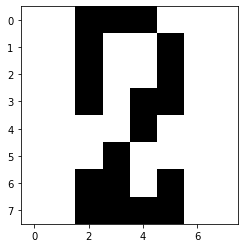

In [18]:
plt.imshow(im2arr2,cmap = plt.cm.gray_r,interpolation='nearest')

In [19]:
y_pred = classifier.predict(img1d2)
print(y_pred)

[2]
